In [51]:
%matplotlib inline
from matplotlib.pyplot import *
from math import *
from numpy import *
from numpy.random import *
from scipy.misc import *
import matplotlib.pyplot as plt
import timeit

#from scipy import *

## Simulate the autoregressive process

In [ ]:
N= 1000;
theta=0.5;
sigma2=2; #se puede cambiar
l=sigma2/(1-theta**2);
X=normal(0,1,(1,1));
AR=();
for k in range(N):
    EPS=normal(0,sigma2,(1,1));
    Y=X;
    X=theta*Y+EPS;
    AR=append(AR,X);
figure(figsize=(20,10))
plot(AR)
title('Autoregressive process')
   

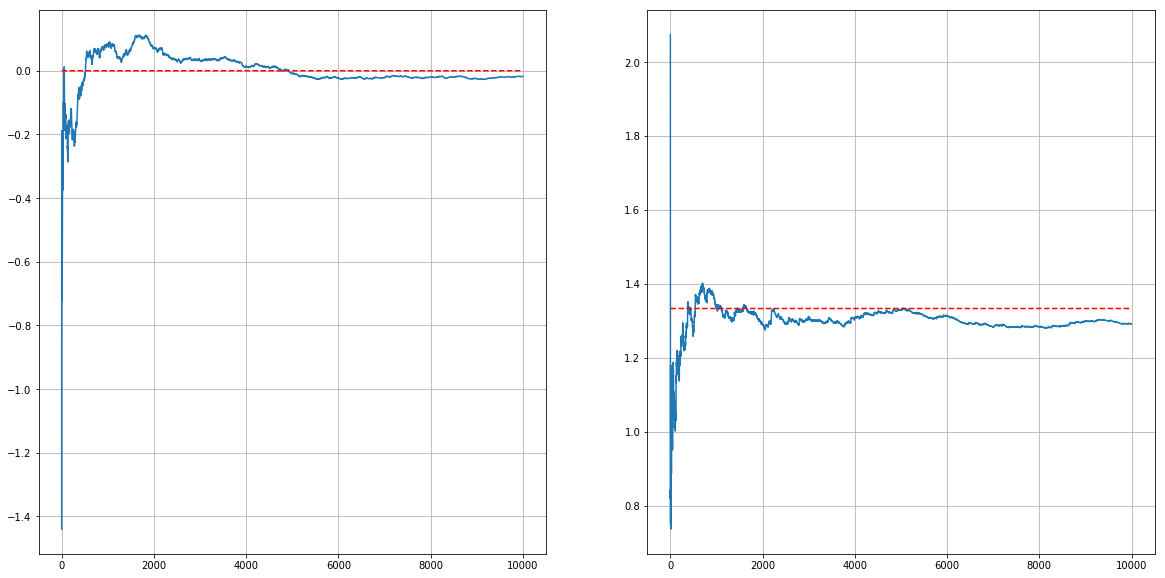

In [59]:
N=10000;
theta=0.5;
sigma2=1;
l=sigma2/(1-theta**2);
X=normal(0,1,(1,1));
SN1=[];
SN2=[];
for k in range(N):
    EPS=normal(0,sigma2,(1,1));
    Y=X;
    X=theta*Y+EPS;
    SN1=append(SN1,X);
    SN2=append(SN2,X*X);
    
T=linspace(1,N,N);
figure(figsize=(20,10))
subplot(121)
plot(cumsum(SN1)/transpose(T))
plot(T,0*linspace(1,1,N),'r--')
grid(True)
subplot(122)
plot(cumsum(SN2)/transpose(T))
plot(T,l*linspace(1,1,N),'r--')
grid(True)
     

## Prove the almost sure convergence

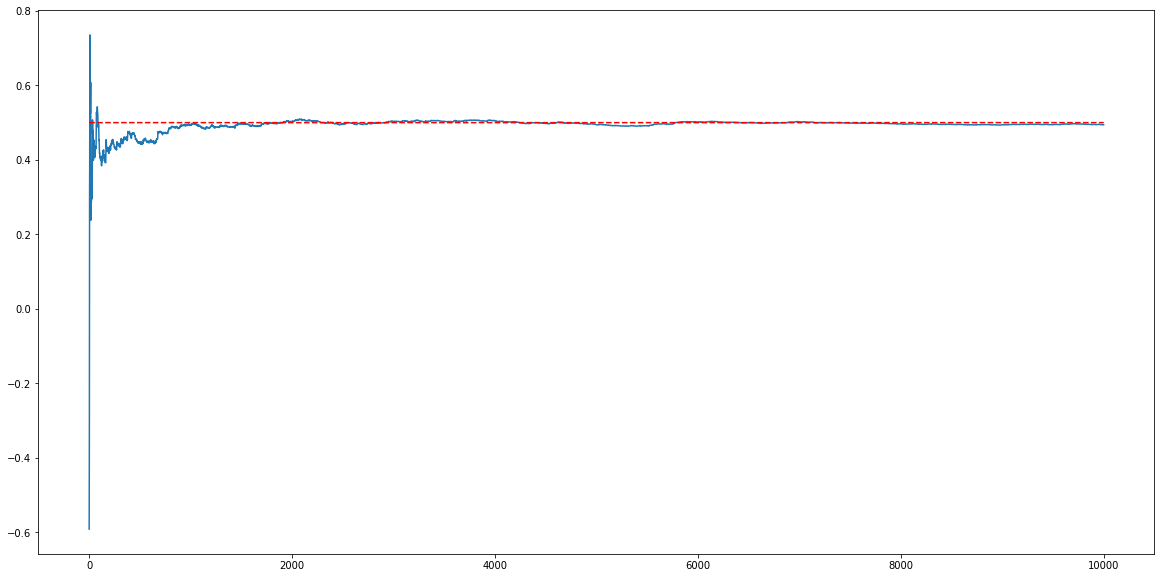

In [60]:
#Algoritmos recursivos, generalmente dependen de los valores de tiempo a priori
#y a posteriori, como es el caso del presente.
N=10000;
theta=0.5;
sigma2=1;
l=sigma2/(1-theta**2);
X=normal(0,1,(1,1));
SN=X*X;
THETAN=[];
THETACN=0;

for k in range(N):
    EPS=normal(0,sigma2,(1,1))
    Y=X;
    X=theta*Y+EPS;
    THETACN=THETACN+(1/SN)*Y*(X-THETACN*Y); #Demostración, Resultado de dividir por Sn
    SN=SN+X*X;#El valor hasta el tiempo N + X^2
    THETAN=append(THETAN,THETACN);
    
T=linspace(1,N,N);
figure(figsize=(20,10))
plot(THETAN)
plot(T,theta*linspace(1,1,N),'r--')


## Prueba 4

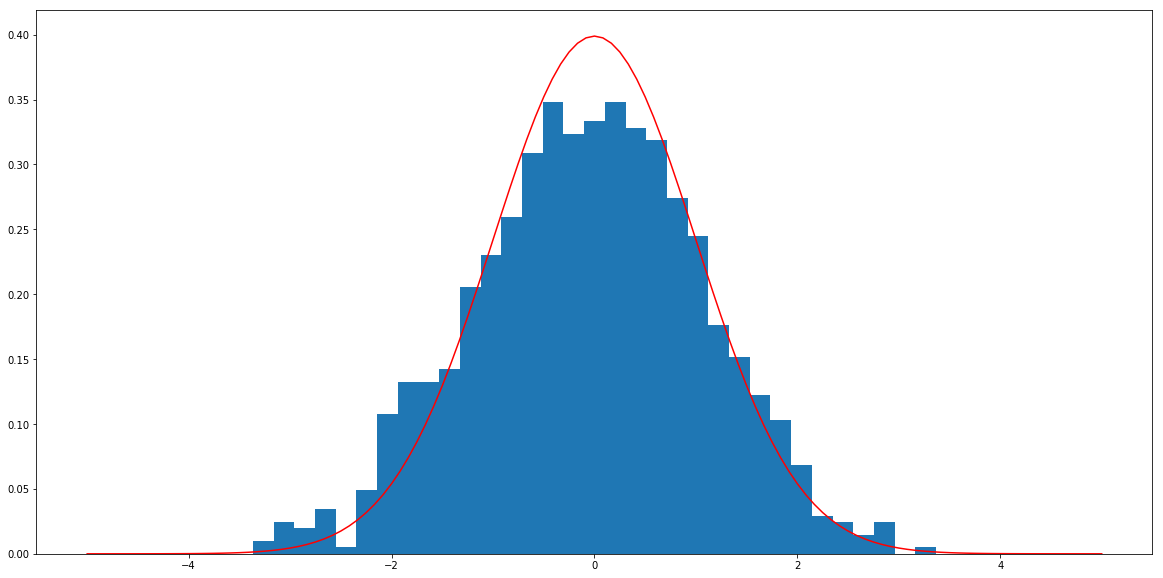

In [58]:
#Evaluando sobre distribuciones

N=1000;
NR=1000;
theta=0.5;
sigma2=1;
Z=[];
for i in range(NR):
    X=normal(0,1,(1,1));
    SN=X*X;
    THETACN=0;
    
    for k in range(N):
        EPS=normal(0,sigma2,(1,1));
        Y=X;
        X=theta*Y+EPS;
        THETACN=THETACN+(1/SN)*Y*(X-THETACN*Y); #Demostración, Limite central
        SN=SN+X*X;#El valor hasta el tiempo N + X^2
    
    Z=append(Z,sqrt(N)*(THETACN-theta)/(1-theta**2));

figure(figsize=(20,10))
hist(Z,bins=linspace(-5,5,50),normed=True);
xx=linspace(-5,5,121);
plot(xx,exp(-xx**2/2)/(sqrt(2*pi)),'r-')